/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


[[ 1.          0.20052748  0.59742211 ...  0.62624881 -0.22733994
   0.28913413]
 [ 0.20052748  1.          0.7465493  ...  0.24990483  0.54305162
   0.52213996]
 [ 0.59742211  0.7465493   1.         ...  0.10402175 -0.00107362
   0.11424675]
 ...
 [ 0.62624881  0.24990483  0.10402175 ...  1.          0.39396584
   0.85434595]
 [-0.22733994  0.54305162 -0.00107362 ...  0.39396584  1.
   0.74283724]
 [ 0.28913413  0.52213996  0.11424675 ...  0.85434595  0.74283724
   1.        ]]


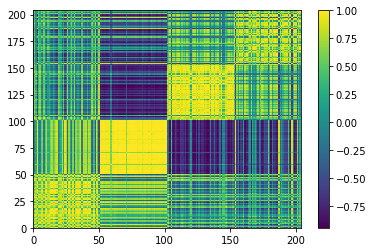

In [285]:
import pandas as pd
import csv
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from pylab import pcolor, show, colorbar, xticks, yticks

mort_data = pd.read_csv('mort.csv')

#print(mort_data.shape)
#print(mort_data.columns)

mask_states = mort_data.FIPS < 100

diseases_chosen = ['Neurological disorders',\
                   'Mental and substance use disorders',\
                   'Self-harm and interpersonal violence',\
                   'Transport injuries',\
                   'Nutritional deficiencies']
mask_disease = mort_data['Category'].isin(diseases_chosen)

filt_mort_data = mort_data[mask_states & mask_disease]
filt_mort_data.reset_index(inplace=True)
filt_mort_data.to_csv('filtered_mort_data.csv')


#DataFrame = pd.read_csv('filtered_mort_data.csv')
df = pd.read_csv('filtered_mort_data.csv', header=0)
df_new = pd.DataFrame.transpose(df)
#print(df_new)
new = df.as_matrix()
#new = new.transpose()
new = new[:-51, 5:-3]
new = np.float64(new)
C = np.corrcoef(new)
print(C)


pcolor(C)
colorbar()
show()